# Lista 01 - Tópicos III

In [12]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('breast-cancer-wisconsin.csv', header=None, delimiter=';')
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Plotting features (2 and 3)

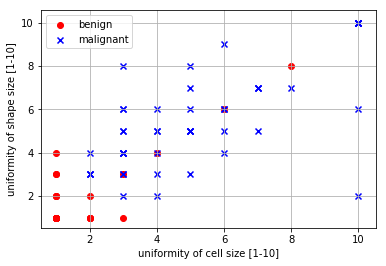

In [3]:
X_benign = data[data[10] == 2][:50]
X_malignant = data[data[10] == 4][:50]

plt.scatter(X_benign[2], X_benign[3],
           color='red', marker='o', label='benign')

plt.scatter(X_malignant[2], X_malignant[3],
           color='blue', marker='x', label='malignant')

plt.xlabel('uniformity of cell size [1-10]')
plt.ylabel('uniformity of shape size [1-10]')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [4]:
# Features chosen: Uniformity of Cell Size (2), Uniformity of Cell Shape (3) and Mitoses (9)

X = data.iloc[:, [2, 3, 9]].values
y = data.iloc[:, -1].values

## Building the MLP classifier with SGD

/home/pedrotorres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


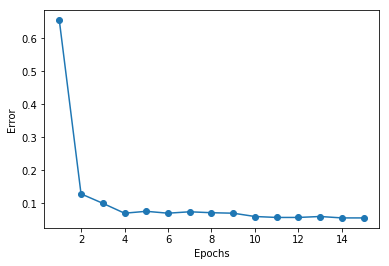

In [5]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='sgd', learning_rate_init=0.01, max_iter=1, warm_start=True)

epochs = 15
errors_mlpc = []

for i in range(epochs):
    errors_mlpc.append(1 - (clf.fit(X, y).score(X, y)))

plt.plot(range(1, epochs + 1), errors_mlpc, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## Building the MLP regressor with SGD

/home/pedrotorres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


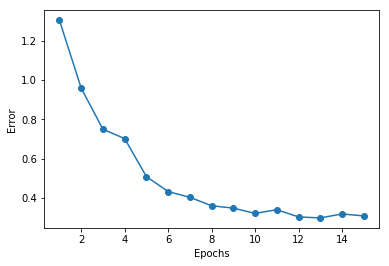

In [6]:
from sklearn.neural_network import MLPRegressor

rgr = MLPRegressor(solver='sgd', learning_rate_init=0.01, max_iter=1, warm_start=True)

epochs = 15
errors_mlpr = []

for i in range(epochs):
    errors_mlpr.append(1 - (rgr.fit(X, y).score(X, y)))

plt.plot(range(1, epochs + 1), errors_mlpr, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## Comparation MLP classifier and regressor

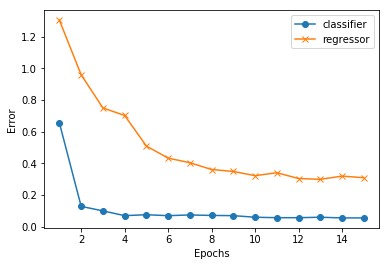

In [7]:
plt.plot(range(1, epochs + 1), errors_mlpc, marker='o', label='classifier')
plt.plot(range(1, epochs + 1), errors_mlpr, marker='x', label='regressor')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend(loc='upper right')
plt.show()

# squared-loss-function (regressor) x log-loss function (classifier)

In [8]:
def get_errors(X, y, epochs, lr, momentum):
    clf = MLPClassifier(solver='sgd', learning_rate_init=lr, max_iter=1, momentum=momentum, warm_start=True)
    rgr = MLPRegressor(solver='sgd', learning_rate_init=lr, max_iter=1, momentum=momentum ,warm_start=True)
    
    clf_errors = []
    rgr_errors = []
    
    for i in range(epochs):
        clf_errors.append(1 - (clf.fit(X, y).score(X, y)))
        rgr_errors.append(1 - (rgr.fit(X, y).score(X, y)))
        
    return clf_errors, rgr_errors

## Epochs x Learning rate x Momentum

/home/pedrotorres/miniconda3/envs/py36/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


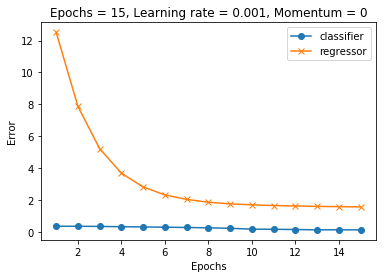

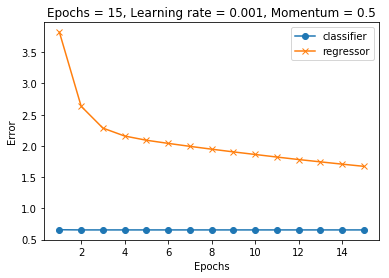

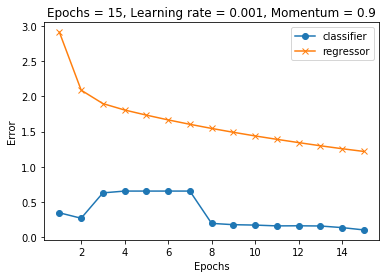

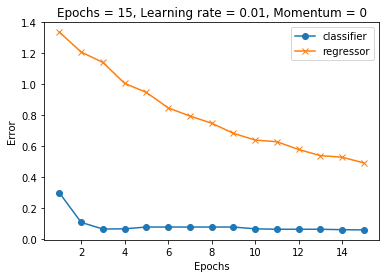

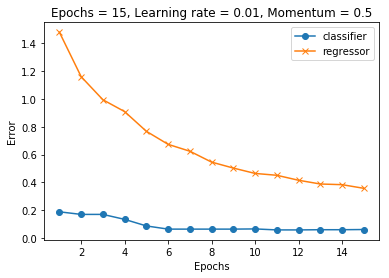

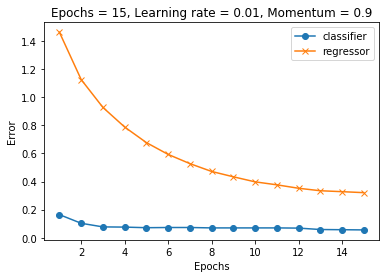

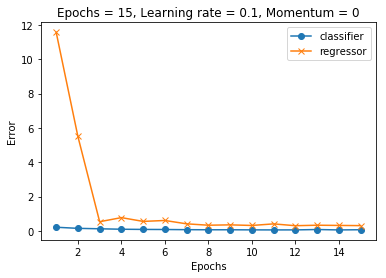

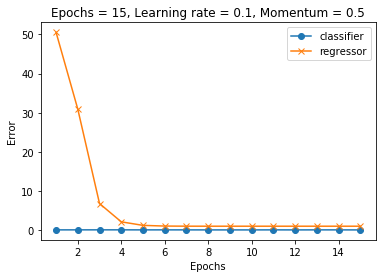

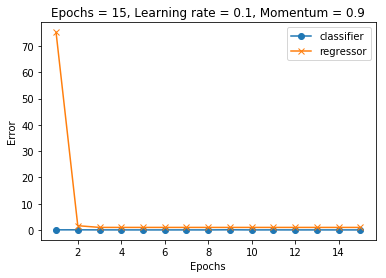

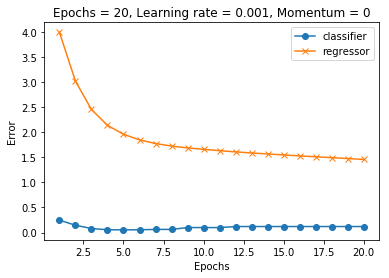

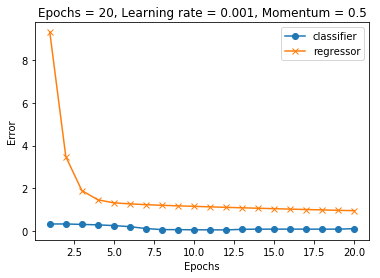

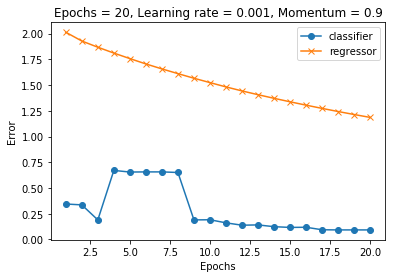

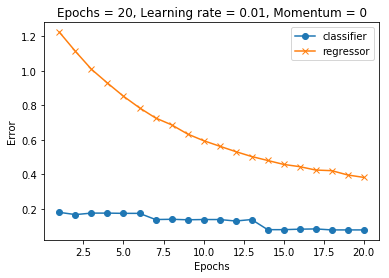

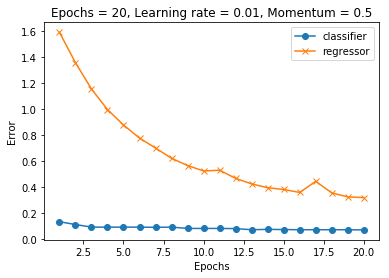

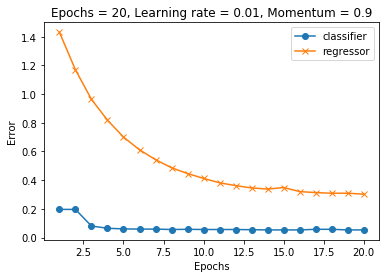

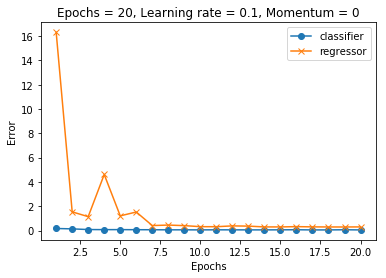

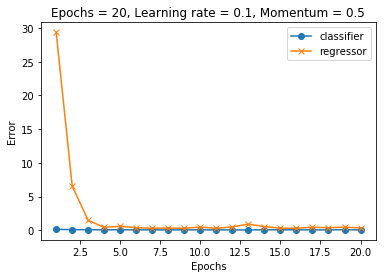

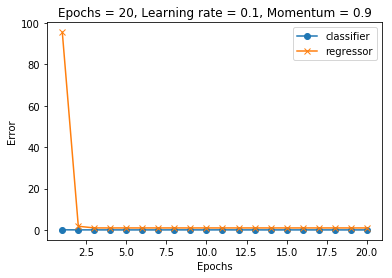

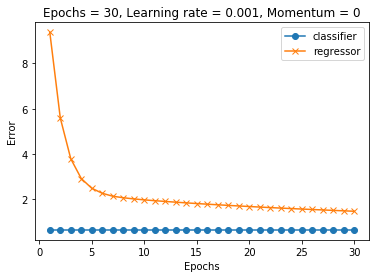

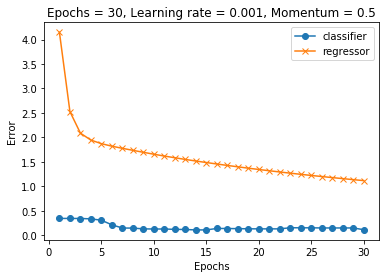

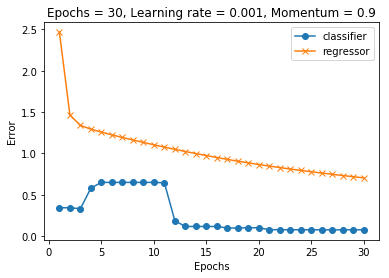

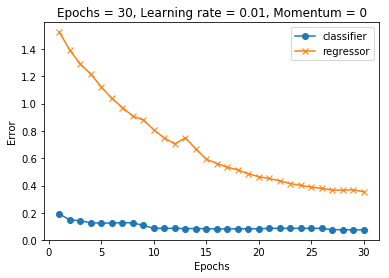

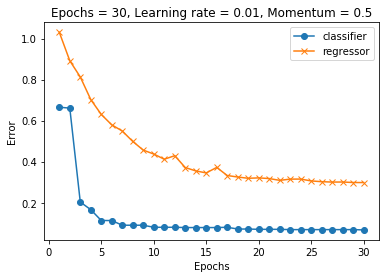

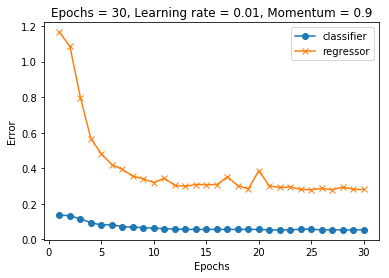

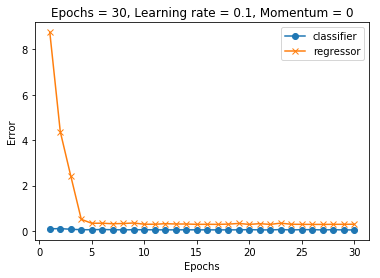

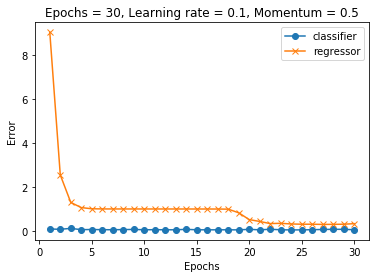

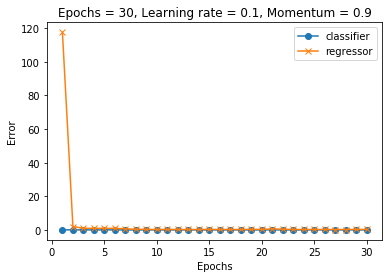

In [9]:
epochs_arr = [15, 20, 30]
lr_arr = [0.001, 0.01, 0.1]
# helps accelerate gradients vectors in the right directions, thus leading to faster converging
momentum_arr = [0, 0.5, 0.9]

for i in epochs_arr:
    for j in lr_arr:
        for k in momentum_arr:
            clf_r, rgr_r = get_errors(X, y, i, j, k)
            plt.plot(range(1, i + 1), clf_r, marker='o', label='classifier')
            plt.plot(range(1, i + 1), rgr_r, marker='x', label='regressor')
            plt.xlabel('Epochs')
            plt.ylabel('Error')
            plt.title('Epochs = {}, Learning rate = {}, Momentum = {}'.format(i, j, k))
            plt.legend()
            plt.show()

## Perceptron implementation

In [58]:
class Perceptron(object):
    def __init__(self, lr = 0.01, n_iter = 15, random_state = 1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state
        
    def net_input(self, X):
        return np.dot(X, self.weights_[1:]) + self.weights_[0]
        
    def predict(self, X):
        z = self.net_input(X)
        if z >= 0:
            return 1
        else:
            return -1
        
    def fit(self, X, y):
        self.weights_ = np.random.RandomState(self.random_state).normal(scale = 0.01, size = X[1].shape[0] + 1)
        self.errors_ = []
        
        for i in range(self.n_iter):
            error = 0.0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.weights_[0] += update
                self.weights_[1:] += xi * update
                
                error += int(update != 0.0)
                    
            self.errors_.append(error)
        
        return self